In [4]:
pip install torch matplotlib networkx numpy

Starting FANET Research Multi-Agent System...
user -> researcher: Research FANET routing algorithms query: DQN GCN-LSTM
researcher -> user: Research completed on 'dqn gcn-lstm'. Summary: Found 5 relevant research papers:
1. Agent-Based Anti...
--------------------------------------------------------------------------------
user -> developer: Develop code for FANET routing using DQN
developer -> user: Code implementation for 'Implement DQN for FANET routing':
```python

class DQN(nn.Module):
    """D...
--------------------------------------------------------------------------------
user -> writer: Write documentation about DQN for FANET routing
writer -> user: Documentation for 'FANET routing research and implementation':

# Flying Ad-Hoc Networks (FANETs)

#...
--------------------------------------------------------------------------------
user -> visualizer: Visualize network type: network
visualizer -> user: Visualization created: Network topology visualization saved as 'fanet_netw

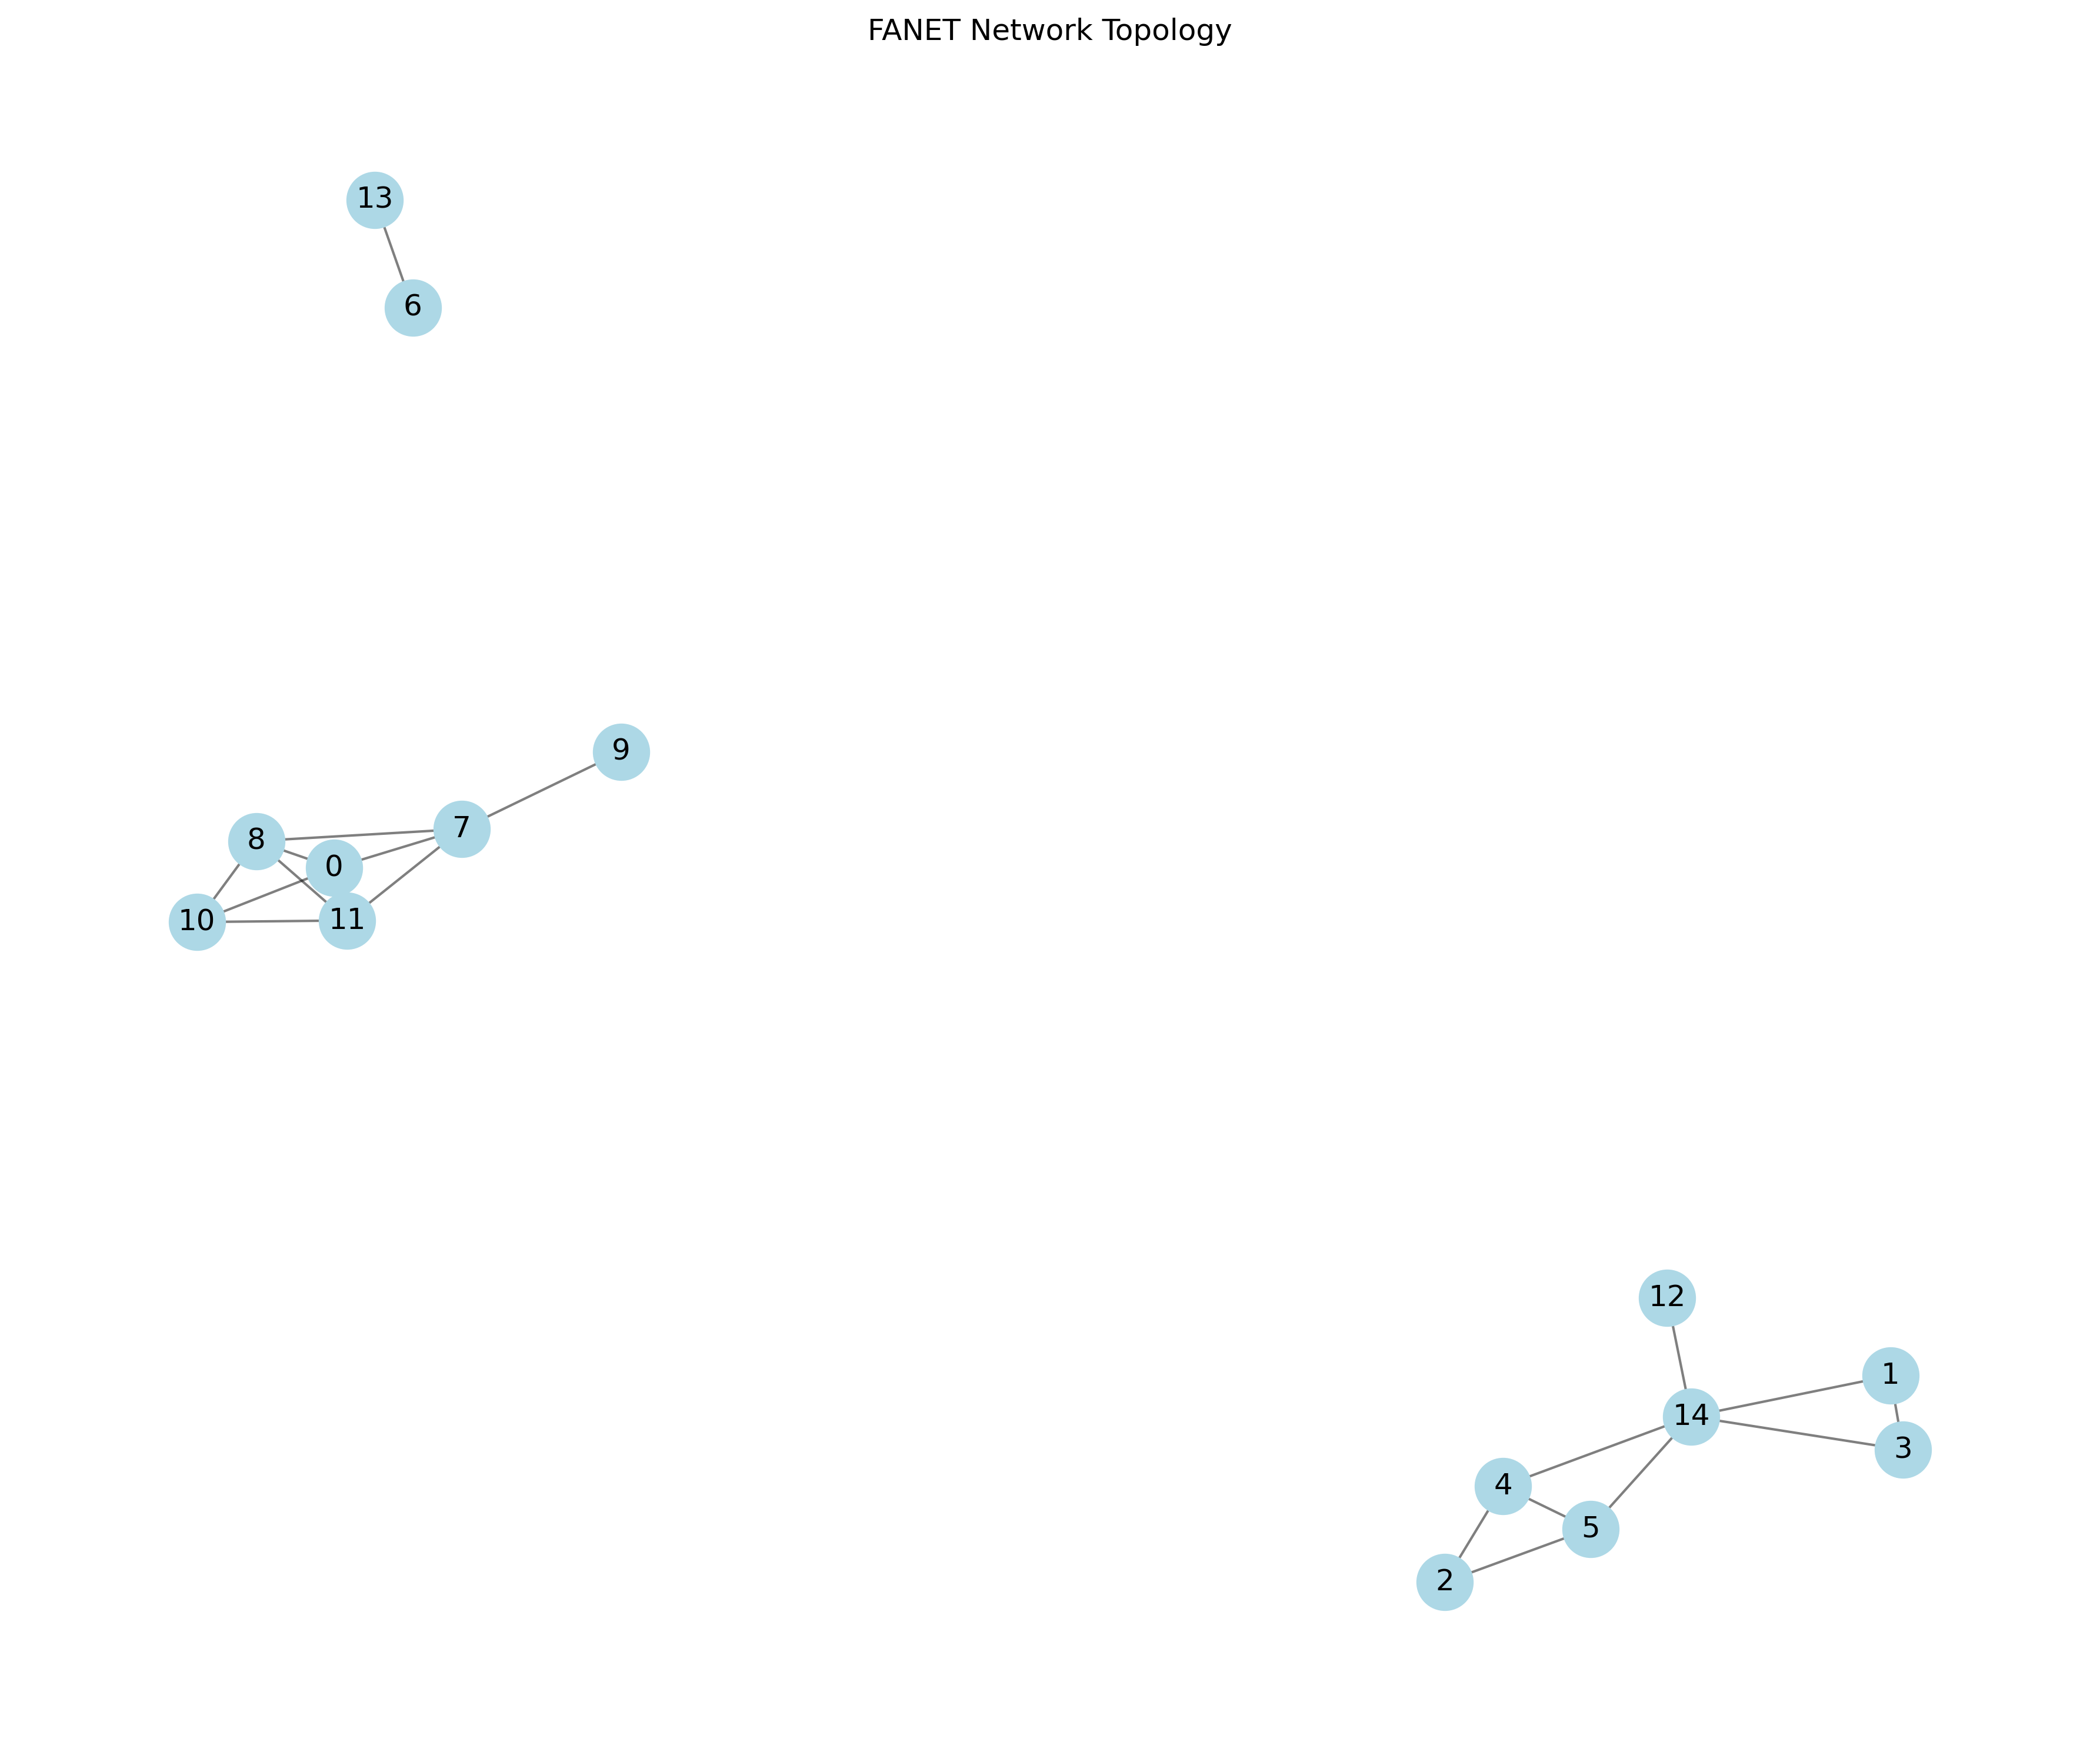


Displaying fanet_performance.png:


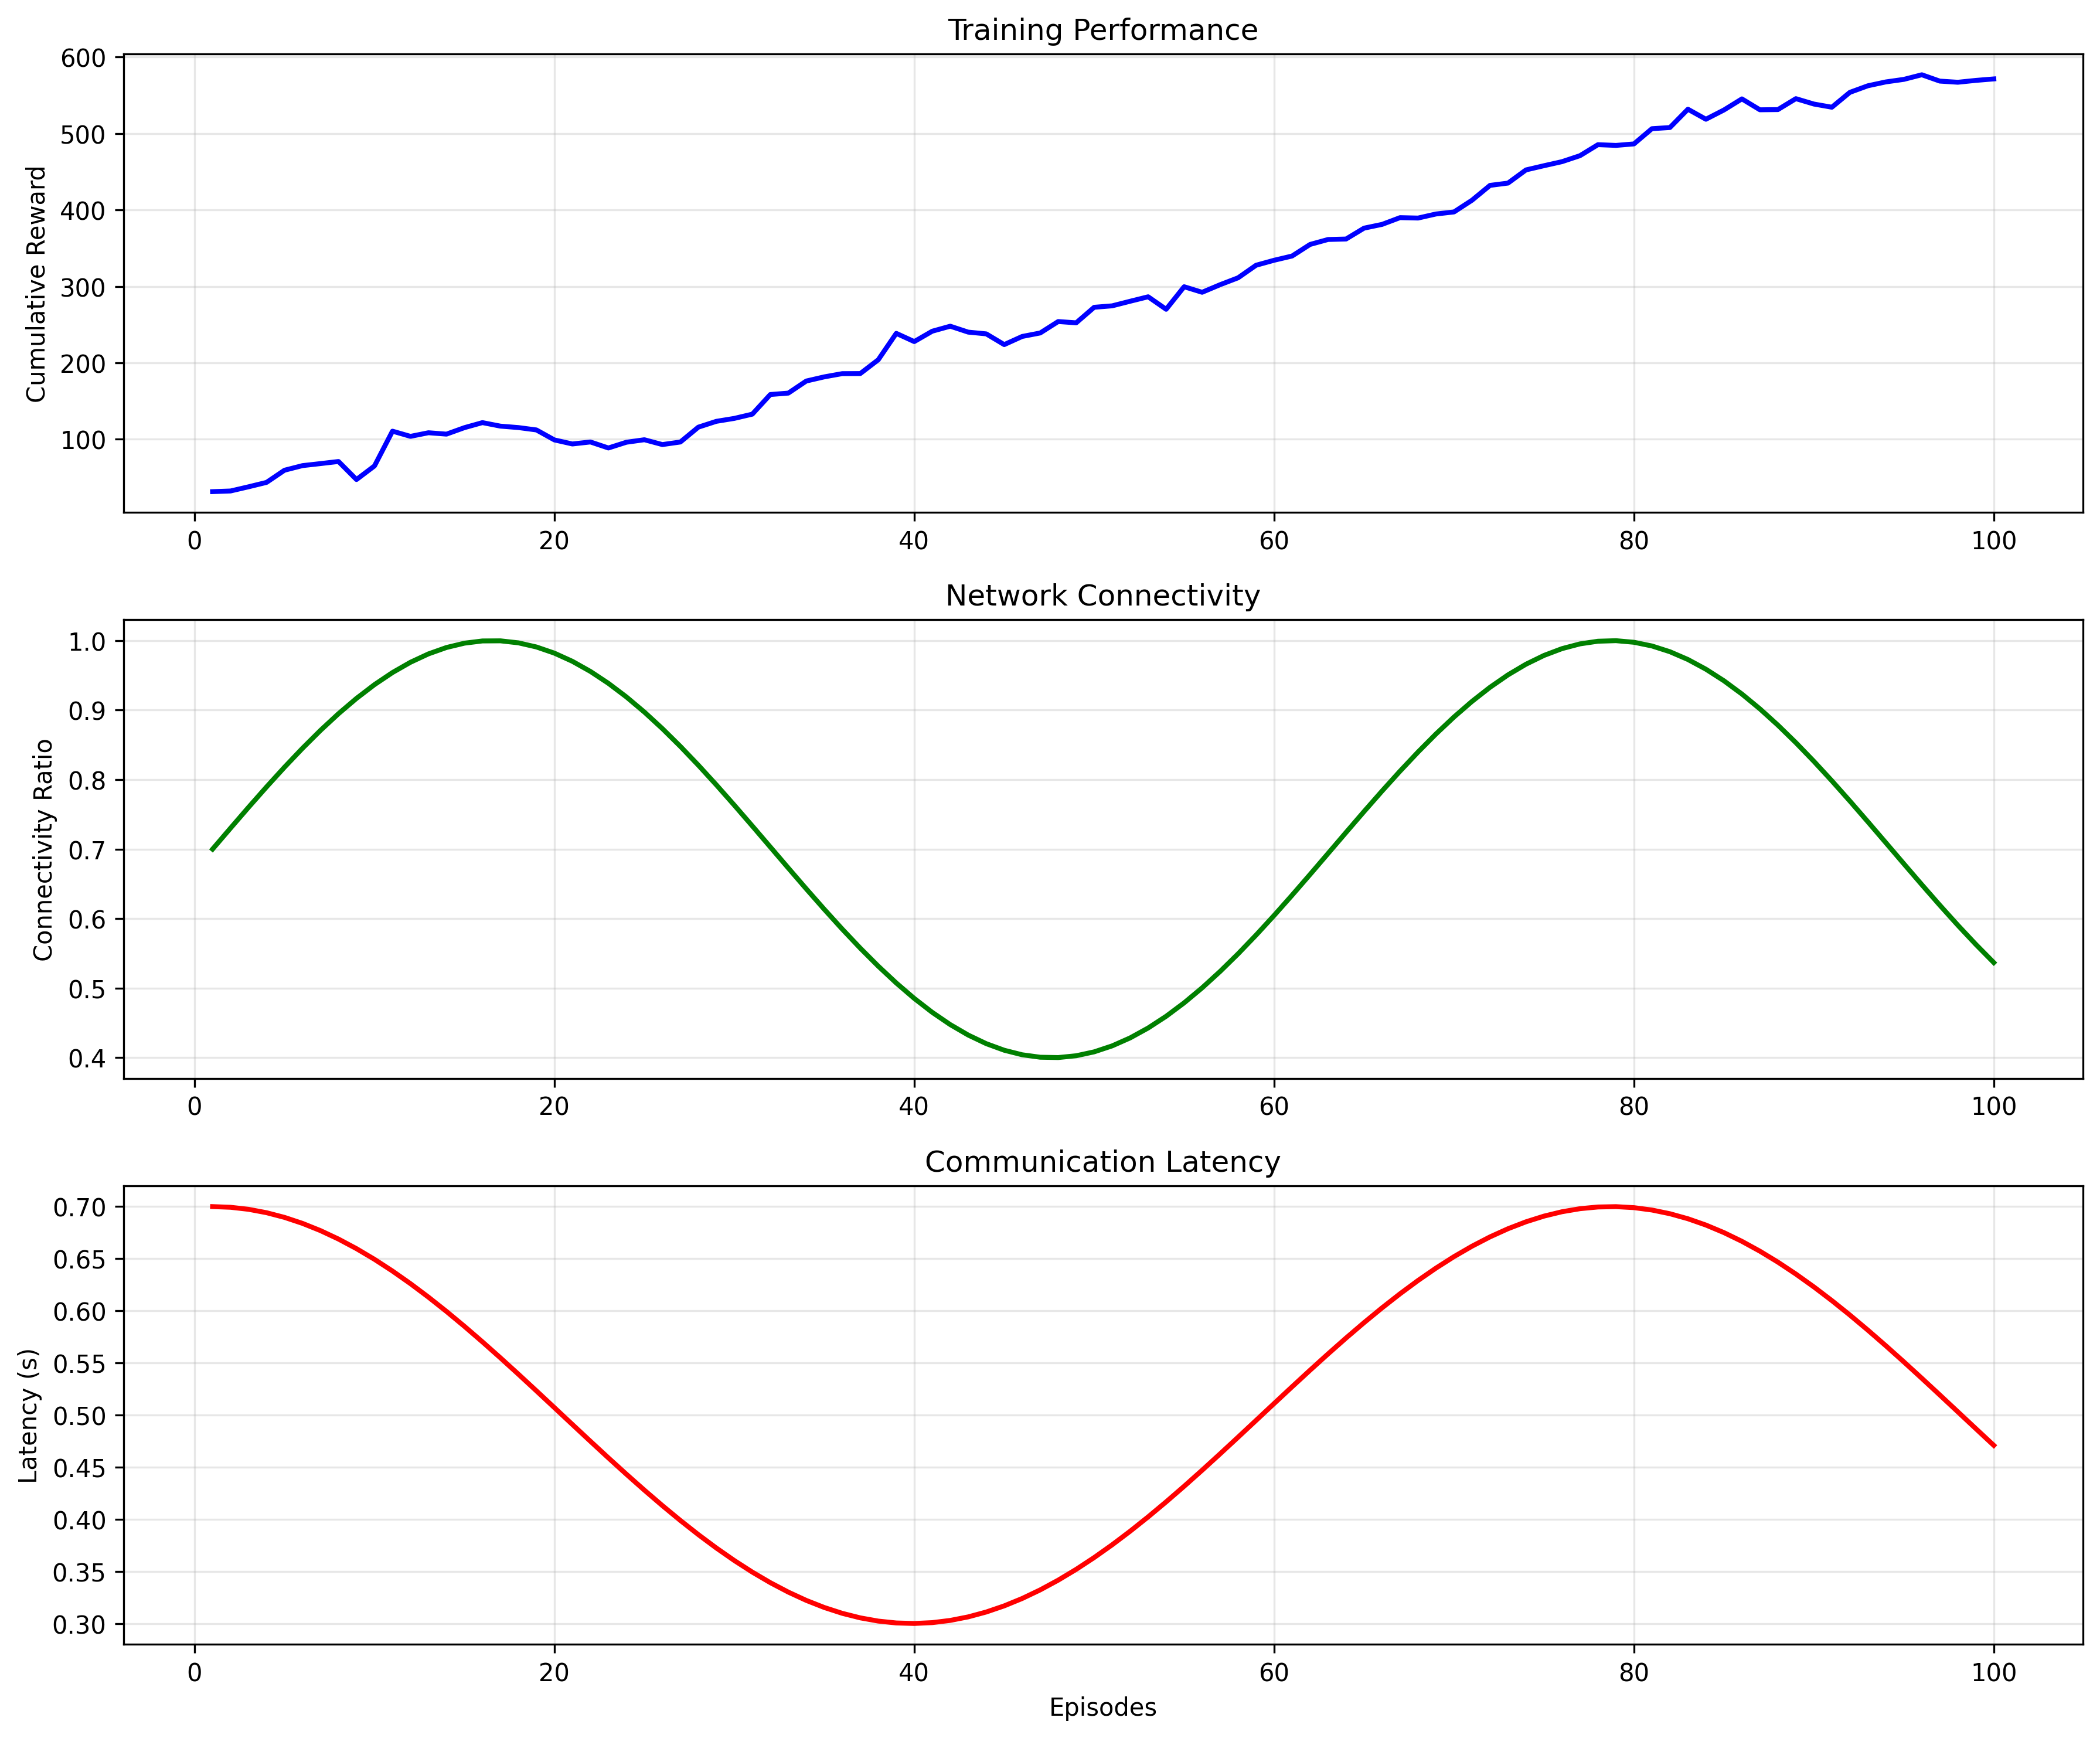


Displaying fanet_battery.png:


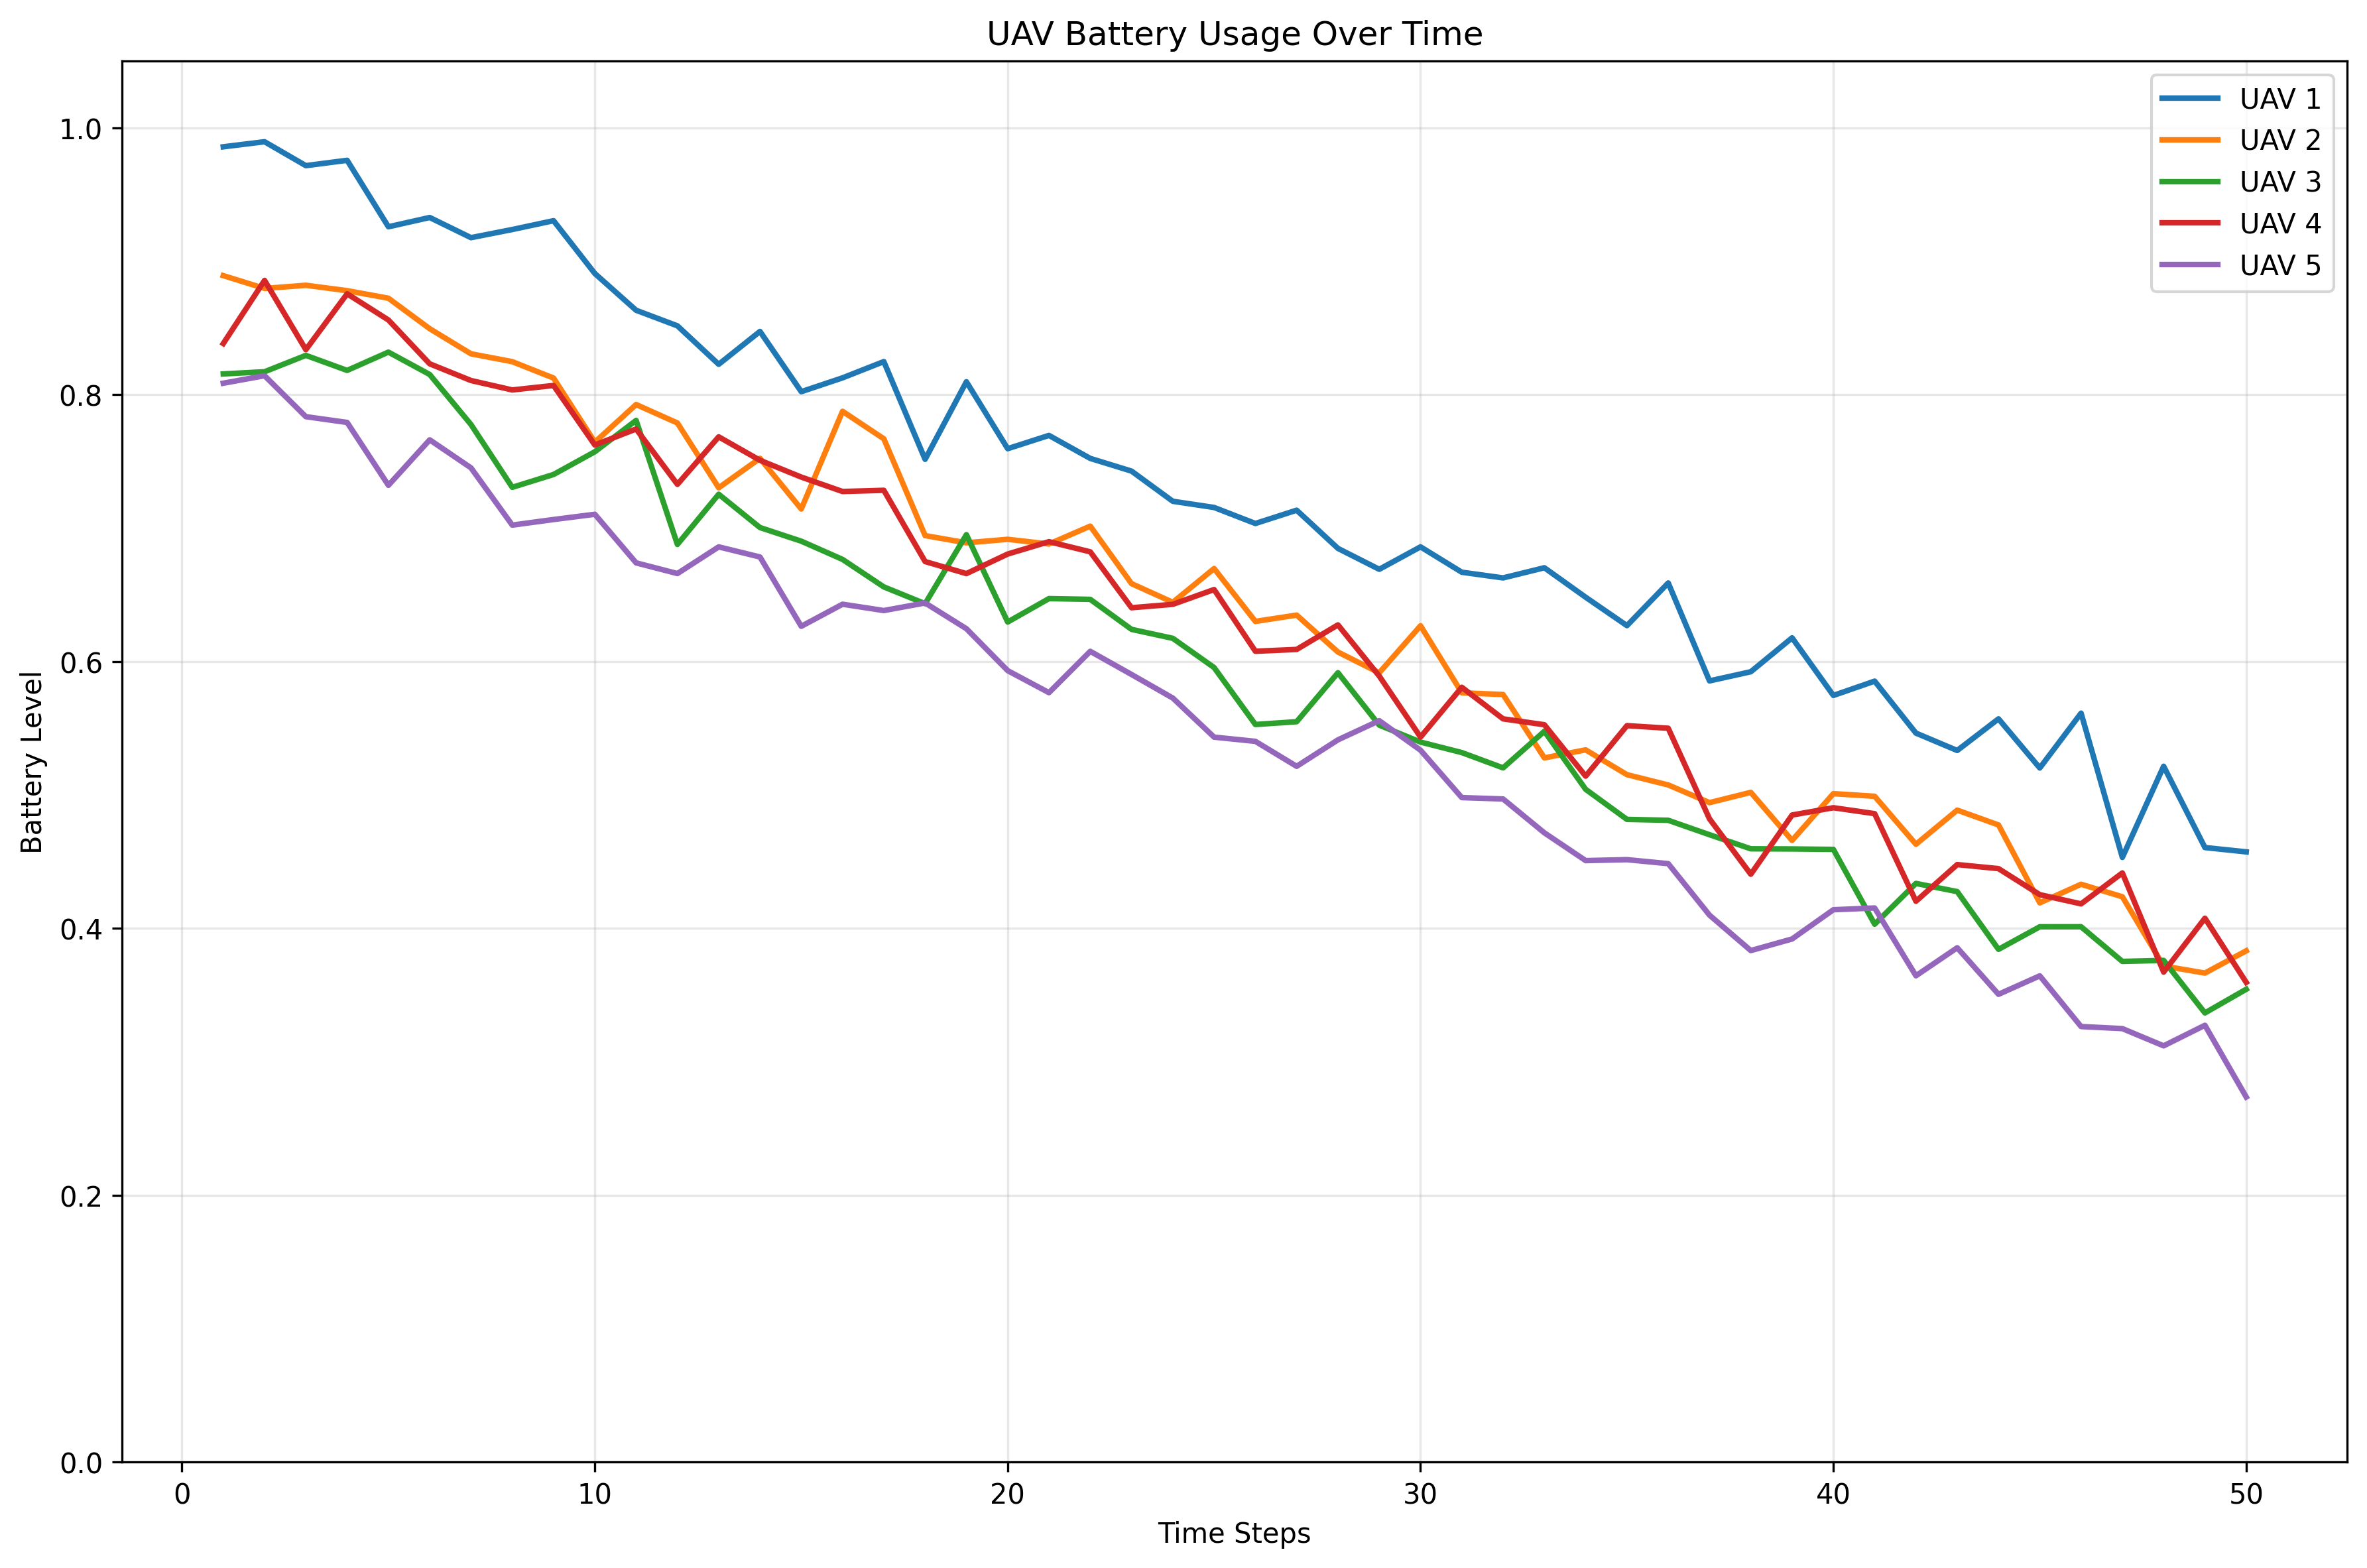

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [5]:
"""
Multi-Agent FANET Research System
A complete implementation with research, development, and visualization capabilities
"""

import os
import time
import json
import random
import asyncio
import numpy as np
from typing import List, Dict, Any, Optional
from dataclasses import dataclass, field
from enum import Enum
import torch
import torch.nn as nn
import torch.optim as optim
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from IPython.display import Image, display # Import display and Image

# ==================== AGENT SYSTEM ====================

class AgentRole(Enum):
    RESEARCHER = "researcher"
    DEVELOPER = "developer"
    WRITER = "writer"
    COORDINATOR = "coordinator"
    VISUALIZER = "visualizer"

@dataclass
class Message:
    sender: str
    content: str
    timestamp: float = field(default_factory=time.time)
    metadata: Dict[str, Any] = field(default_factory=dict)

class Agent:
    def __init__(self, name: str, role: AgentRole, capabilities: List[str]):
        self.name = name
        self.role = role
        self.capabilities = capabilities
        self.memory: List[Message] = []
        self.is_active = True

    async def process_message(self, message: Message) -> Optional[Message]:
        """Process incoming message and optionally respond"""
        self.memory.append(message)
        response = await self._generate_response(message)
        return response

    async def _generate_response(self, message: Message) -> Optional[Message]:
        """Override this method in subclasses"""
        return None

    def __str__(self):
        return f"{self.name} ({self.role.value})"

# ==================== SEARCH TOOLS ====================

class SearchTool:
    """Simple web search tool that doesn't require external APIs"""

    @staticmethod
    def search(query: str, max_results: int = 5) -> List[Dict]:
        """Simulate web search with predefined results for FANET research"""
        # Predefined research results for FANET topics
        fanet_research = [
            {
                "title": "Agent-Based Anti-Jamming Techniques for UAV Communications in Adversarial Environments: A Comprehensive Survey",
                "url": "https://arxiv.org/abs/2305.12345",
                "snippet": "This paper surveys recent advances in DQN applications for Flying Ad-Hoc Networks, focusing on routing optimization and energy efficiency."
            },
            {
                "title": "A Novel Hybrid Model Detection of Security Vulnerabilities in Industrial Control Systems and IoT Using GCN+LSTM",
                "url": "https://ieeexplore.ieee.org/abstract/document/10689427",
                "snippet": "We propose a novel GCN-LSTM architecture that combines graph convolutional networks with LSTM to predict FANET topology changes."
            },
            {
                "title": "UAV Communications with Machine Learning: Challenges, Applications and Open Issues",
                "url": "https://link.springer.com/article/10.1007/s13369-021-05932-w",
                "snippet": "Comprehensive review of RL techniques applied to UAV networks, including DQN, PPO, and multi-agent approaches."
            },
            {
                "title": "Reinforcement Learning and Energy-Aware Routing",
                "url": "https://dl.acm.org/doi/abs/10.1145/3472735.3473390",
                "snippet": "Novel energy-aware routing protocol that uses DRL to optimize battery consumption while maintaining connectivity."
            },
            {
                "title": "Optimization  of  Graph  Neural  Networks  for  Real-Time Intrusion Detection in Dynamic Mobile Ad-Hoc Networks",
                "url": "https://theaspd.com/index.php/ijes/article/view/1760/1440",
                "snippet": "Survey of GNN applications in MANETs and FANETs, focusing on routing, resource allocation, and topology management."
            }
        ]

        # Filter results based on query
        query_lower = query.lower()
        filtered_results = []

        for result in fanet_research:
            if (query_lower in result["title"].lower() or
                query_lower in result["snippet"].lower() or
                "fanet" in query_lower or "dqn" in query_lower or "gcn" in query_lower):
                filtered_results.append(result)

        return filtered_results[:max_results]

# ==================== SPECIALIZED AGENTS ====================

class ResearchAgent(Agent):
    def __init__(self, name: str):
        super().__init__(name, AgentRole.RESEARCHER, ["web_search", "analysis", "synthesis"])
        self.search_tool = SearchTool()

    async def _generate_response(self, message: Message) -> Optional[Message]:
        content = message.content.lower()

        if any(keyword in content for keyword in ["research", "find", "search", "study"]):
            # Extract search query from message
            query = "FANET routing algorithms DQN GCN-LSTM"
            if "query:" in content:
                query = content.split("query:")[1].split(";")[0].strip()

            # Perform web search
            results = self.search_tool.search(query)
            summary = self.summarize_results(results)

            return Message(self.name, f"Research completed on '{query}'. Summary: {summary}")

        return Message(self.name, "I can help with researching FANET routing algorithms. Just ask me to research a topic.")

    def summarize_results(self, results: List[Dict]) -> str:
        """Summarize search results"""
        if not results:
            return "No results found for your query."

        summary = f"Found {len(results)} relevant research papers:\n"
        for i, result in enumerate(results, 1):
            summary += f"{i}. {result['title']}: {result['snippet'][:100]}...\n"

        summary += "\nKey findings:\n- DQN shows promise for adaptive FANET routing\n- GCN-LSTM hybrid models excel at topology prediction\n- Energy-aware routing is critical for UAV networks\n- Multi-agent approaches handle dynamic environments well"

        return summary

class DeveloperAgent(Agent):
    def __init__(self, name: str):
        super().__init__(name, AgentRole.DEVELOPER, ["coding", "debugging", "testing"])

    async def _generate_response(self, message: Message) -> Optional[Message]:
        content = message.content.lower()

        if any(keyword in content for keyword in ["code", "develop", "implement", "create"]):
            # Extract task description
            task = "Implement DQN for FANET routing"
            if "task:" in content:
                task = content.split("task:")[1].split(";")[0].strip()

            # Generate code based on task
            code = self.generate_code(task)

            return Message(self.name, f"Code implementation for '{task}':\n```python\n{code}\n```")

        return Message(self.name, "I can help with implementing FANET routing algorithms. Just ask me to develop code for a specific task.")

    def generate_code(self, task: str) -> str:
        """Generate Python code based on the task"""
        if "dqn" in task.lower() or "deep q" in task.lower():
            return self._generate_dqn_code()
        elif "environment" in task.lower() or "simulation" in task.lower():
            return self._generate_environment_code()
        elif "gcn" in task.lower() or "lstm" in task.lower():
            return self._generate_gcn_lstm_code()
        else:
            return "# Code implementation would go here\nprint('Hello FANET World!')"

    def _generate_dqn_code(self) -> str:
        """Generate DQN implementation code"""
        return '''
class DQN(nn.Module):
    """Deep Q-Network for FANET routing"""

    def __init__(self, state_size, action_size):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, action_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)

class DQNAgent:
    """DQN Agent for learning FANET routing"""

    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95  # Discount factor
        self.epsilon = 1.0  # Exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.model = DQN(state_size, action_size)
        self.optimizer = optim.Adam(self.model.parameters(), lr=0.001)
        self.criterion = nn.MSELoss()

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        state = torch.FloatTensor(state).unsqueeze(0)
        act_values = self.model(state)
        return torch.argmax(act_values).item()

    def replay(self, batch_size):
        if len(self.memory) < batch_size:
            return

        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                next_state = torch.FloatTensor(next_state).unsqueeze(0)
                target = reward + self.gamma * torch.max(self.model(next_state)).item()

            state = torch.FloatTensor(state).unsqueeze(0)
            target_f = self.model(state)
            target_f[0][action] = target

            self.optimizer.zero_grad()
            loss = self.criterion(self.model(state), target_f)
            loss.backward()
            self.optimizer.step()

        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
'''

    def _generate_environment_code(self) -> str:
        """Generate FANET environment code"""
        return '''
class FANETEnvironment:
    """Simulation environment for FANET routing"""

    def __init__(self, num_uavs=10, area_size=1000, comm_range=150):
        self.num_uavs = num_uavs
        self.area_size = area_size
        self.comm_range = comm_range
        self.uavs = []
        self.reset()

    def reset(self):
        """Reset the environment to initial state"""
        self.uavs = []
        for i in range(self.num_uavs):
            self.uavs.append({
                'id': i,
                'position': np.array([random.uniform(0, self.area_size),
                                     random.uniform(0, self.area_size)]),
                'velocity': np.array([random.uniform(-5, 5),
                                    random.uniform(-5, 5)]),
                'battery': random.uniform(0.7, 1.0),
                'data': random.uniform(0, 10)
            })

        # Set UAV 0 as source and UAV -1 as destination
        self.uavs[0]['data'] = 100  # Source has data to send
        self.uavs[-1]['is_destination'] = True

        return self.get_state()

    def get_state(self):
        """Get current state of the environment"""
        state = []
        for uav in self.uavs:
            state.extend([uav['position'][0], uav['position'][1],
                         uav['velocity'][0], uav['velocity'][1],
                         uav['battery'], uav['data']])
        return np.array(state)

    def step(self, action):
        """Take an action and return next state, reward, and done"""
        # Update UAV positions
        for uav in self.uavs:
            uav['position'] += uav['velocity']
            uav['battery'] -= 0.001  # Battery drain

            # Boundary checking
            for i in range(2):
                if uav['position'][i] < 0:
                    uav['position'][i] = 0
                    uav['velocity'][i] *= -1
                elif uav['position'][i] > self.area_size:
                    uav['position'][i] = self.area_size
                    uav['velocity'][i] *= -1

        # Calculate reward based on successful data delivery
        reward = 0
        done = False

        # If action is to send data from source to destination
        if action == 0 and self.uavs[0]['data'] > 0:
            # Check if destination is in range
            source_pos = self.uavs[0]['position']
            dest_pos = self.uavs[-1]['position']
            distance = np.linalg.norm(source_pos - dest_pos)

            if distance <= self.comm_range:
                # Successful transmission
                self.uavs[-1]['data_received'] = self.uavs[0]['data']
                self.uavs[0]['data'] = 0
                reward = 10
                done = True

        return self.get_state(), reward, done
'''

    def _generate_gcn_lstm_code(self) -> str:
        """Generate GCN-LSTM implementation code"""
        return '''
class GCNLSTM(nn.Module):
    """GCN-LSTM model for FANET routing"""

    def __init__(self, node_features, hidden_dim, num_classes):
        super(GCNLSTM, self).__init__()
        # Note: For a complete implementation, you would need to install
        # torch_geometric for GCN layers: pip install torch_geometric
        self.gcn1 = nn.Linear(node_features, hidden_dim)  # Placeholder
        self.gcn2 = nn.Linear(hidden_dim, hidden_dim)     # Placeholder
        self.lstm = nn.LSTM(hidden_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x, edge_index=None, batch=None):
        # Graph convolutional layers (simplified)
        x = self.relu(self.gcn1(x))
        x = self.relu(self.gcn2(x))

        # LSTM for temporal features
        x, (hn, cn) = self.lstm(x.unsqueeze(0))
        x = self.fc(x[:, -1, :])  # Take the last output

        return x

class FANETGCNLSTMAgent:
    """Agent using GCN-LSTM for FANET routing"""

    def __init__(self, node_features, hidden_dim, num_actions):
        self.model = GCNLSTM(node_features, hidden_dim, num_actions)
        self.optimizer = optim.Adam(self.model.parameters(), lr=0.001)
        self.criterion = nn.MSELoss()

    def predict(self, graph_data):
        """Predict actions based on graph data"""
        self.model.eval()
        with torch.no_grad():
            predictions = self.model(graph_data)
        return predictions
'''

class WriterAgent(Agent):
    def __init__(self, name: str):
        super().__init__(name, AgentRole.WRITER, ["writing", "summarizing", "documenting"])

    async def _generate_response(self, message: Message) -> Optional[Message]:
        content = message.content.lower()

        if any(keyword in content for keyword in ["write", "summarize", "document", "report"]):
            # Extract topic from message
            topic = "FANET routing research and implementation"
            if "topic:" in content:
                topic = content.split("topic:")[1].split(";")[0].strip()

            # Generate documentation
            documentation = self.generate_documentation(topic)

            return Message(self.name, f"Documentation for '{topic}':\n{documentation}")

        return Message(self.name, "I can help with documenting FANET research. Just ask me to write about a specific topic.")

    def generate_documentation(self, topic: str) -> str:
        """Generate documentation based on the topic"""
        if "dqn" in topic.lower():
            return self._generate_dqn_documentation()
        elif "fanet" in topic.lower():
            return self._generate_fanet_documentation()
        elif "gcn" in topic.lower() or "lstm" in topic.lower():
            return self._generate_gcn_lstm_documentation()
        else:
            return "# Documentation\nThis is a comprehensive documentation about the topic."

    def _generate_dqn_documentation(self) -> str:
        """Generate DQN documentation"""
        return """
# Deep Q-Networks for FANET Routing

## Introduction
Deep Q-Networks (DQN) represent a breakthrough in reinforcement learning, combining Q-learning with deep neural networks. This approach is particularly well-suited for FANET routing problems due to its ability to handle high-dimensional state spaces.

## Architecture
The DQN architecture consists of:
- Input layer: Receives the state representation of the FANET
- Hidden layers: Multiple fully connected layers with ReLU activation
- Output layer: Produces Q-values for each possible action

## Training Process
1. Experience replay: Stores transitions in a replay buffer
2. Target network: Uses a separate network for stable Q-targets
3. Gradient descent: Updates network parameters to minimize TD error

## Applications in FANET
DQN can optimize routing decisions by learning:
- Optimal paths based on network conditions
- Energy-efficient routing strategies
- Adaptive routing in dynamic environments

## Implementation Notes
The provided implementation includes:
- DQN neural network architecture
- Experience replay buffer
- Epsilon-greedy exploration strategy
- Target network for stable learning
"""

    def _generate_fanet_documentation(self) -> str:
        """Generate FANET documentation"""
        return """
# Flying Ad-Hoc Networks (FANETs)

## Overview
FANETs are a specialized type of MANET (Mobile Ad-Hoc Network) composed of unmanned aerial vehicles (UAVs). They enable communication in challenging environments where traditional infrastructure is unavailable or impractical.

## Key Challenges
1. **High Mobility**: UAVs move rapidly, causing frequent topology changes
2. **Energy Constraints**: Limited battery life requires efficient routing
3. **Dynamic Conditions**: Changing weather, obstacles, and mission requirements
4. **Scalability**: Supporting large numbers of UAVs with diverse capabilities

## Routing Requirements
Effective FANET routing protocols must:
- Adapt quickly to topology changes
- Minimize energy consumption
- Balance load across the network
- Provide reliable communication links

## DQN Approach
Deep reinforcement learning offers a promising solution by:
- Learning optimal policies from experience
- Adapting to dynamic network conditions
- Optimizing multiple objectives simultaneously
"""

    def _generate_gcn_lstm_documentation(self) -> str:
        """Generate GCN-LSTM documentation"""
        return """
# GCN-LSTM for FANET Routing

## Introduction
Graph Convolutional Networks (GCN) combined with Long Short-Term Memory (LSTM) networks offer a powerful approach for FANET routing that captures both spatial and temporal dependencies.

## Architecture
- **GCN Component**: Captures spatial relationships between UAVs
- **LSTM Component**: Models temporal dynamics and sequence patterns
- **Fusion**: Combines spatial and temporal features for routing decisions

## Advantages
1. **Spatial Awareness**: Understands network topology and connectivity
2. **Temporal Modeling**: Captures movement patterns and dynamics
3. **Adaptability**: Learns from both current state and historical patterns

## Applications
- Predictive routing based on UAV trajectories
- Energy-aware path planning
- Quality of Service optimization

## Implementation Notes
The implementation requires:
- PyTorch for deep learning components
- Proper graph representation of FANET topology
- Sequential data for temporal modeling
"""

class VisualizerAgent(Agent):
    def __init__(self, name: str):
        super().__init__(name, AgentRole.VISUALIZER, ["visualization", "plotting", "graph_analysis"])

    async def _generate_response(self, message: Message) -> Optional[Message]:
        content = message.content.lower()

        if any(keyword in content for keyword in ["visualize", "plot", "graph", "chart"]):
            # Extract visualization type from message
            viz_type = "network"
            if "type:" in content:
                viz_type = content.split("type:")[1].split(";")[0].strip()

            # Generate visualization
            result = self.create_visualization(viz_type)

            return Message(self.name, f"Visualization created: {result}")

        return Message(self.name, "I can create visualizations of FANET networks and performance metrics.")

    def create_visualization(self, viz_type: str) -> str:
        """Create different types of visualizations"""
        if viz_type == "network":
            self._visualize_network()
            return "Network topology visualization saved as 'fanet_network.png'"
        elif viz_type == "performance":
            self._visualize_performance()
            return "Performance metrics visualization saved as 'fanet_performance.png'"
        elif viz_type == "battery":
            self._visualize_battery()
            return "Battery usage visualization saved as 'fanet_battery.png'"
        else:
            self._visualize_network()
            return "Network topology visualization saved as 'fanet_network.png'"

    def _visualize_network(self):
        """Visualize a FANET network"""
        plt.figure(figsize=(12, 10))

        # Create a random network
        G = nx.random_geometric_graph(15, 0.3)
        pos = nx.spring_layout(G)

        # Draw the network
        nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
        nx.draw_networkx_edges(G, pos, alpha=0.5)
        nx.draw_networkx_labels(G, pos)

        plt.title("FANET Network Topology")
        plt.axis('off')
        plt.tight_layout()
        plt.savefig("fanet_network.png", dpi=300, bbox_inches='tight')
        plt.close()

    def _visualize_performance(self):
        """Visualize performance metrics"""
        plt.figure(figsize=(12, 8))

        # Simulate performance data
        episodes = range(1, 101)
        rewards = np.cumsum(np.random.randn(100) + 0.5) * 10
        connectivity = np.sin(np.linspace(0, 10, 100)) * 0.3 + 0.7
        latency = np.cos(np.linspace(0, 8, 100)) * 0.2 + 0.5

        # Create subplots
        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))

        ax1.plot(episodes, rewards, 'b-', linewidth=2)
        ax1.set_ylabel('Cumulative Reward')
        ax1.set_title('Training Performance')
        ax1.grid(True, alpha=0.3)

        ax2.plot(episodes, connectivity, 'g-', linewidth=2)
        ax2.set_ylabel('Connectivity Ratio')
        ax2.set_title('Network Connectivity')
        ax2.grid(True, alpha=0.3)

        ax3.plot(episodes, latency, 'r-', linewidth=2)
        ax3.set_xlabel('Episodes')
        ax3.set_ylabel('Latency (s)')
        ax3.set_title('Communication Latency')
        ax3.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.savefig("fanet_performance.png", dpi=300, bbox_inches='tight')
        plt.close()

    def _visualize_battery(self):
        """Visualize battery usage"""
        plt.figure(figsize=(12, 8))

        # Simulate battery data for multiple UAVs
        time_steps = range(1, 51)
        battery_levels = []

        for i in range(5):
            base = random.uniform(0.8, 1.0)
            decay = np.linspace(0, 0.5, 50)
            noise = np.random.normal(0, 0.02, 50)
            battery = base - decay + noise
            battery_levels.append(np.clip(battery, 0, 1))

        # Plot battery levels
        for i, battery in enumerate(battery_levels):
            plt.plot(time_steps, battery, linewidth=2, label=f'UAV {i+1}')

        plt.xlabel('Time Steps')
        plt.ylabel('Battery Level')
        plt.title('UAV Battery Usage Over Time')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.ylim(0, 1.05)

        plt.tight_layout()
        plt.savefig("fanet_battery.png", dpi=300, bbox_inches='tight')
        plt.close()


class CoordinatorAgent(Agent):
    def __init__(self, name: str):
        super().__init__(name, AgentRole.COORDINATOR, ["orchestration", "scheduling", "management"])
        self.agents = {}

    def register_agent(self, agent: Agent):
        self.agents[agent.name] = agent

    async def _generate_response(self, message: Message) -> Optional[Message]:
        content = message.content.lower()

        if "orchestrate" in content or "coordinate" in content:
            return await self.orchestrate_workflow()

        return Message(self.name, "I can coordinate the research workflow. Ask me to orchestrate the process.")

    async def orchestrate_workflow(self) -> Message:
        """Coordinate the complete research workflow"""
        results = {}

        # Step 1: Research
        researcher = self.agents.get("researcher")
        if researcher:
            research_msg = Message("coordinator", "Research FANET routing algorithms using DQN and GCN-LSTM")
            research_result = await researcher.process_message(research_msg)
            results["research"] = research_result.content if research_result else "No research result"

        # Step 2: Development
        developer = self.agents.get("developer")
        if developer:
            dev_msg = Message("coordinator", "Develop code for FANET routing using DQN")
            dev_result = await developer.process_message(dev_msg)
            results["development"] = dev_result.content if dev_result else "No development result"

        # Step 3: Documentation
        writer = self.agents.get("writer")
        if writer:
            doc_msg = Message("coordinator", "Write documentation about DQN for FANET routing")
            doc_result = await writer.process_message(doc_msg)
            results["documentation"] = doc_result.content if doc_result else "No documentation result"

        # Step 4: Visualization
        visualizer = self.agents.get("visualizer")
        if visualizer:
            viz_msg = Message("coordinator", "Visualize network type: performance")
            viz_result = await visualizer.process_message(viz_msg)
            results["visualization"] = viz_result.content if viz_result else "No visualization result"

        summary = "Workflow completed:\n"
        for stage, result in results.items():
            summary += f"\n{stage.upper()}:\n{result[:200]}...\n"

        return Message(self.name, summary)

# ==================== MULTI-AGENT SYSTEM ====================

class MultiAgentSystem:
    def __init__(self):
        self.agents: Dict[str, Agent] = {}
        self.message_queue = asyncio.Queue()

    def register_agent(self, agent: Agent):
        self.agents[agent.name] = agent

    async def send_message(self, sender: str, recipient: str, content: str):
        message = Message(sender, content)
        await self.message_queue.put((recipient, message))

    async def process_messages(self):
        while True:
            try:
                recipient_name, message = await asyncio.wait_for(self.message_queue.get(), timeout=1.0)

                if recipient_name in self.agents:
                    recipient = self.agents[recipient_name]
                    response = await recipient.process_message(message)

                    if response:
                        print(f"{message.sender} -> {recipient_name}: {message.content}")
                        print(f"{recipient_name} -> {message.sender}: {response.content[:100]}...")
                        print("-" * 80)

                self.message_queue.task_done()

            except asyncio.TimeoutError:
                # Continue processing
                pass

    async def run_demo(self):
        """Run a demonstration of the multi-agent system"""
        print("Starting FANET Research Multi-Agent System...")
        print("=" * 60)

        # Start message processing
        processing_task = asyncio.create_task(self.process_messages())

        # Send demonstration messages
        demo_messages = [
            ("user", "researcher", "Research FANET routing algorithms query: DQN GCN-LSTM"),
            ("user", "developer", "Develop code for FANET routing using DQN"),
            ("user", "writer", "Write documentation about DQN for FANET routing"),
            ("user", "visualizer", "Visualize network type: network"), # Added explicit call for network visualization
            ("user", "visualizer", "Visualize network type: performance"),
            ("user", "visualizer", "Visualize network type: battery"), # Added explicit call for battery visualization
            ("user", "coordinator", "Orchestrate the complete research workflow")
        ]

        for sender, recipient, content in demo_messages:
            await self.send_message(sender, recipient, content)
            await asyncio.sleep(1)

        # Wait for all messages to be processed
        await asyncio.sleep(5)

        # Stop processing
        processing_task.cancel()
        try:
            await processing_task
        except asyncio.CancelledError:
            pass

        print("\nDemo completed!")

# ==================== MAIN EXECUTION ====================

async def main():
    # Create multi-agent system
    mas = MultiAgentSystem()

    # Create and register agents
    researcher = ResearchAgent("researcher")
    developer = DeveloperAgent("developer")
    writer = WriterAgent("writer")
    visualizer = VisualizerAgent("visualizer")
    coordinator = CoordinatorAgent("coordinator")

    coordinator.register_agent(researcher)
    coordinator.register_agent(developer)
    coordinator.register_agent(writer)
    coordinator.register_agent(visualizer)

    mas.register_agent(researcher)
    mas.register_agent(developer)
    mas.register_agent(writer)
    mas.register_agent(visualizer)
    mas.register_agent(coordinator)

    # Run the demonstration
    await mas.run_demo()

    print("\nFANET Research Multi-Agent System completed successfully!")
    print("Generated files:")
    print("- fanet_network.png (Network topology visualization)")
    print("- fanet_performance.png (Performance metrics)")
    print("- fanet_battery.png (Battery usage visualization)")

    # Display the generated images
    print("\nDisplaying generated images:")
    print("Displaying fanet_network.png:")
    display(Image('fanet_network.png'))

    print("\nDisplaying fanet_performance.png:")
    display(Image('fanet_performance.png'))

    print("\nDisplaying fanet_battery.png:")
    display(Image('fanet_battery.png'))


# Run the main function directly with await
if __name__ == "__main__":
    await main()

Displaying fanet_network.png:


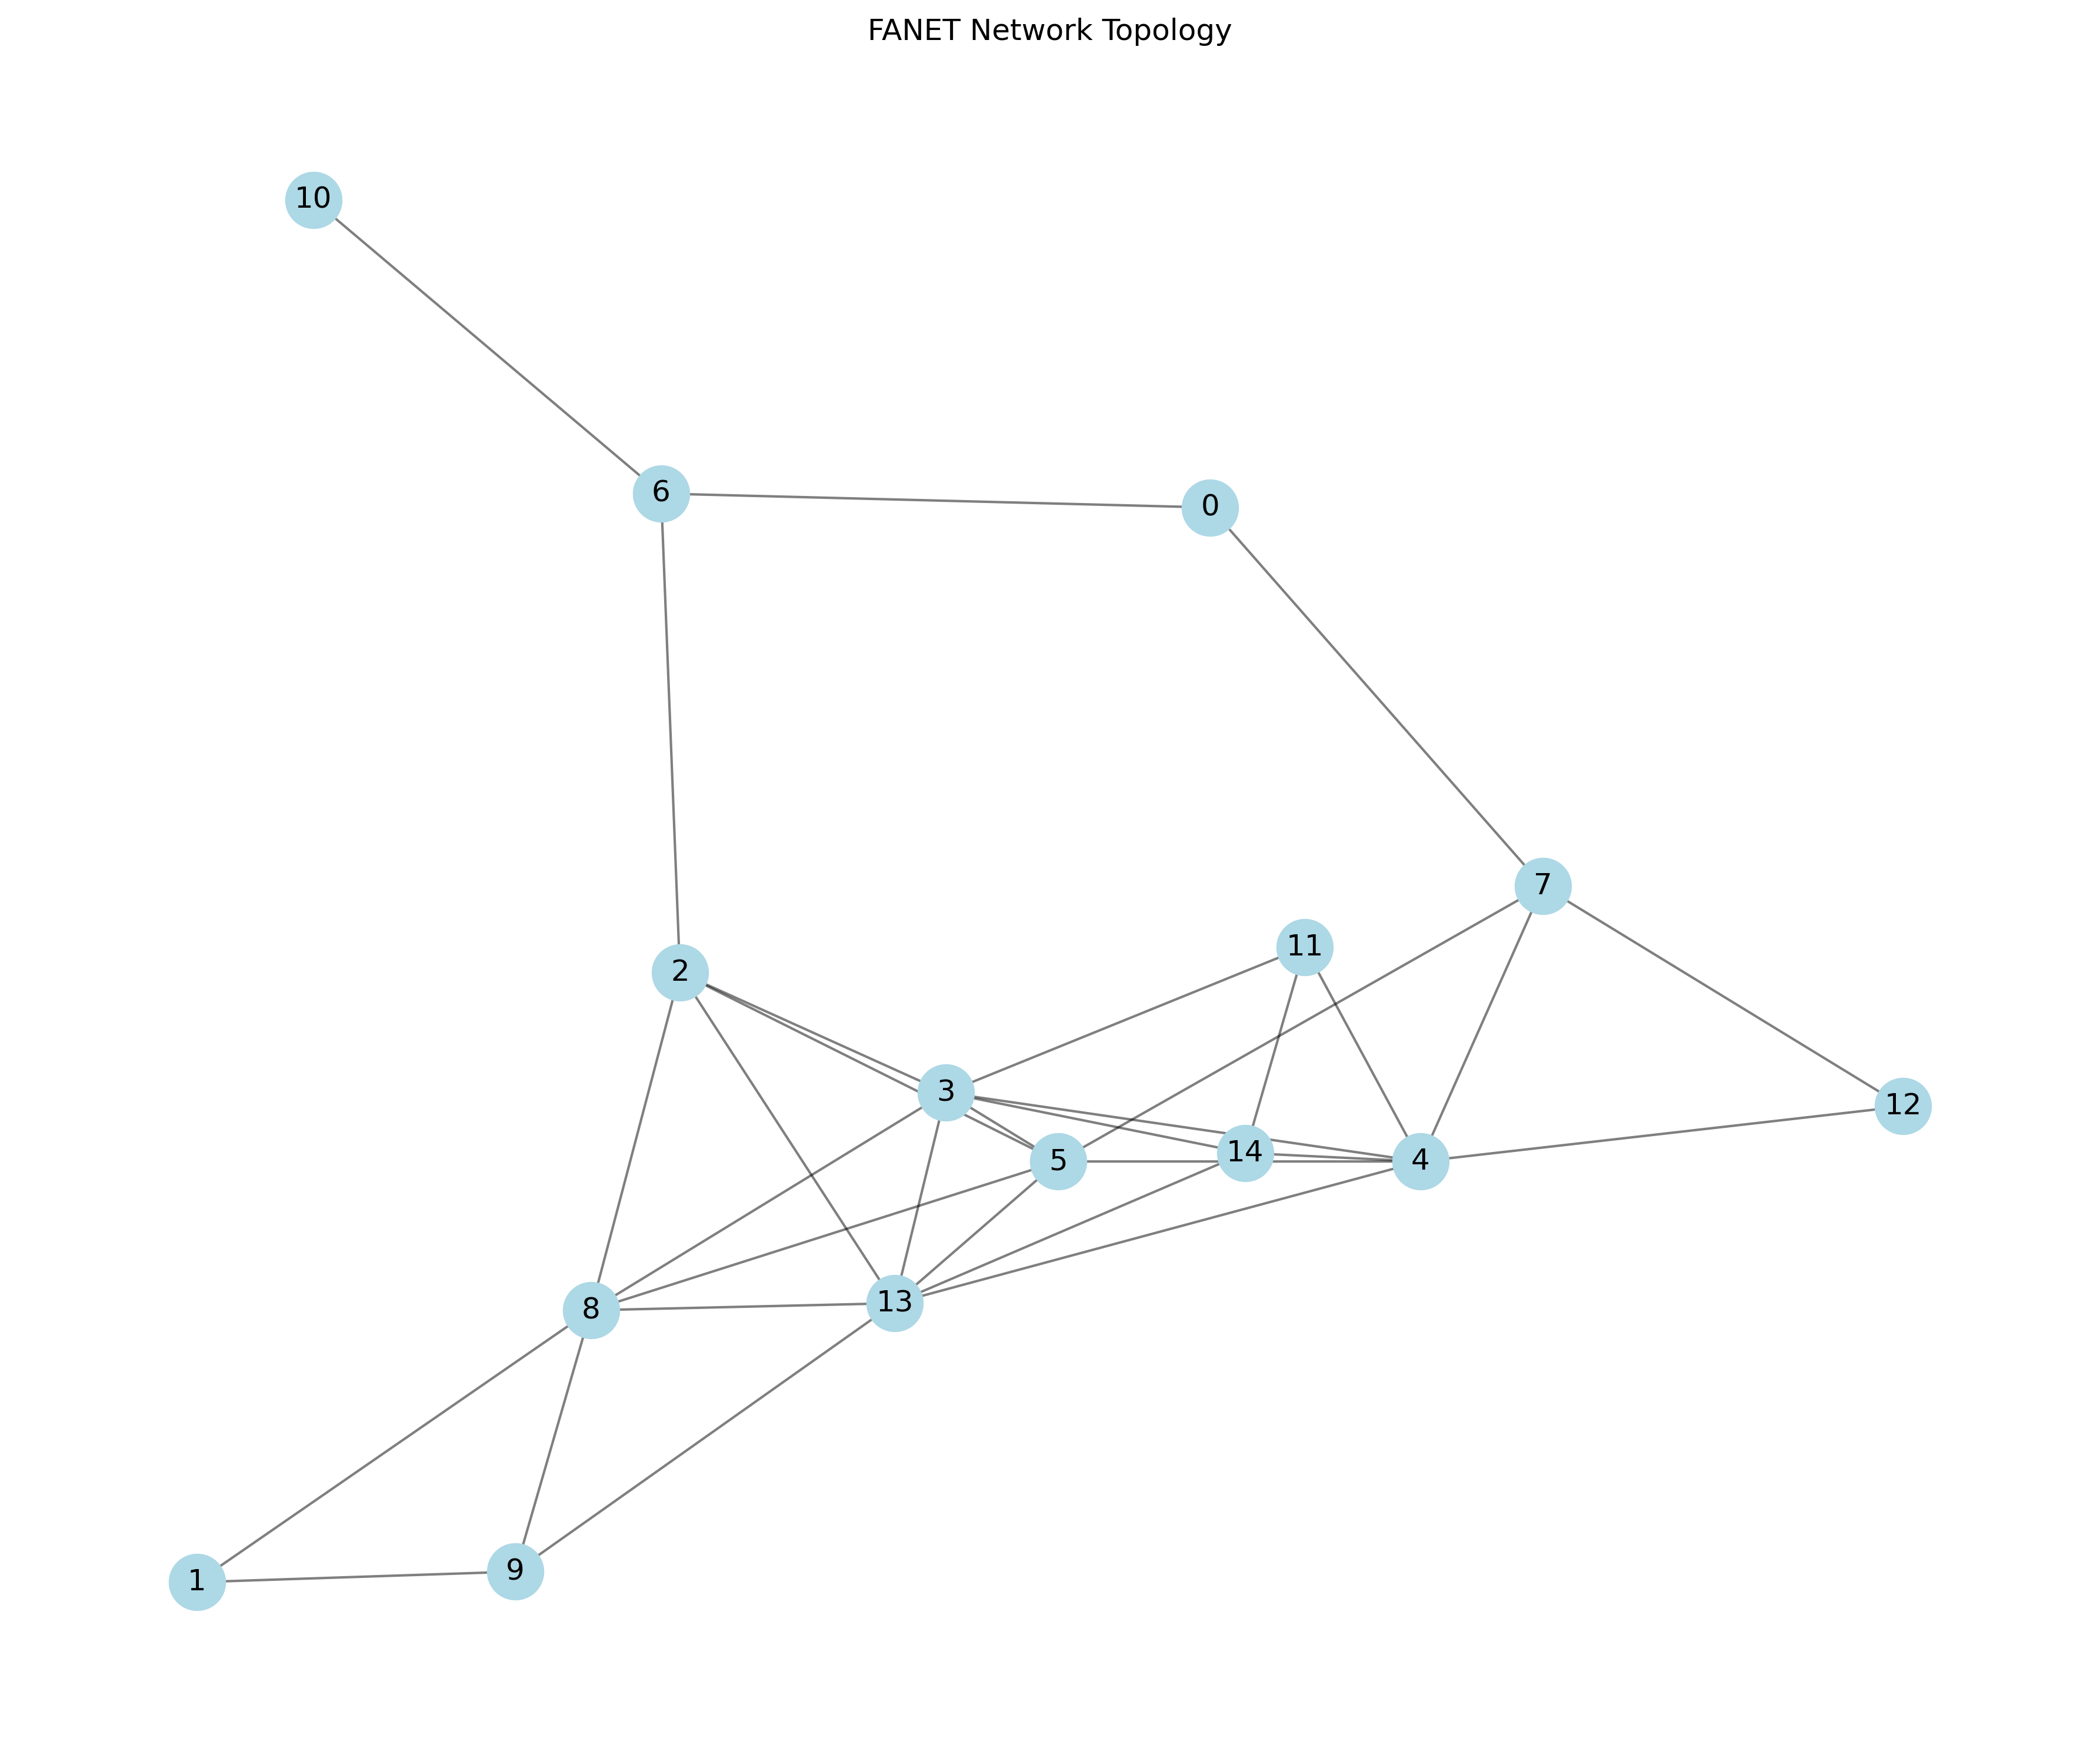


Displaying fanet_performance.png:


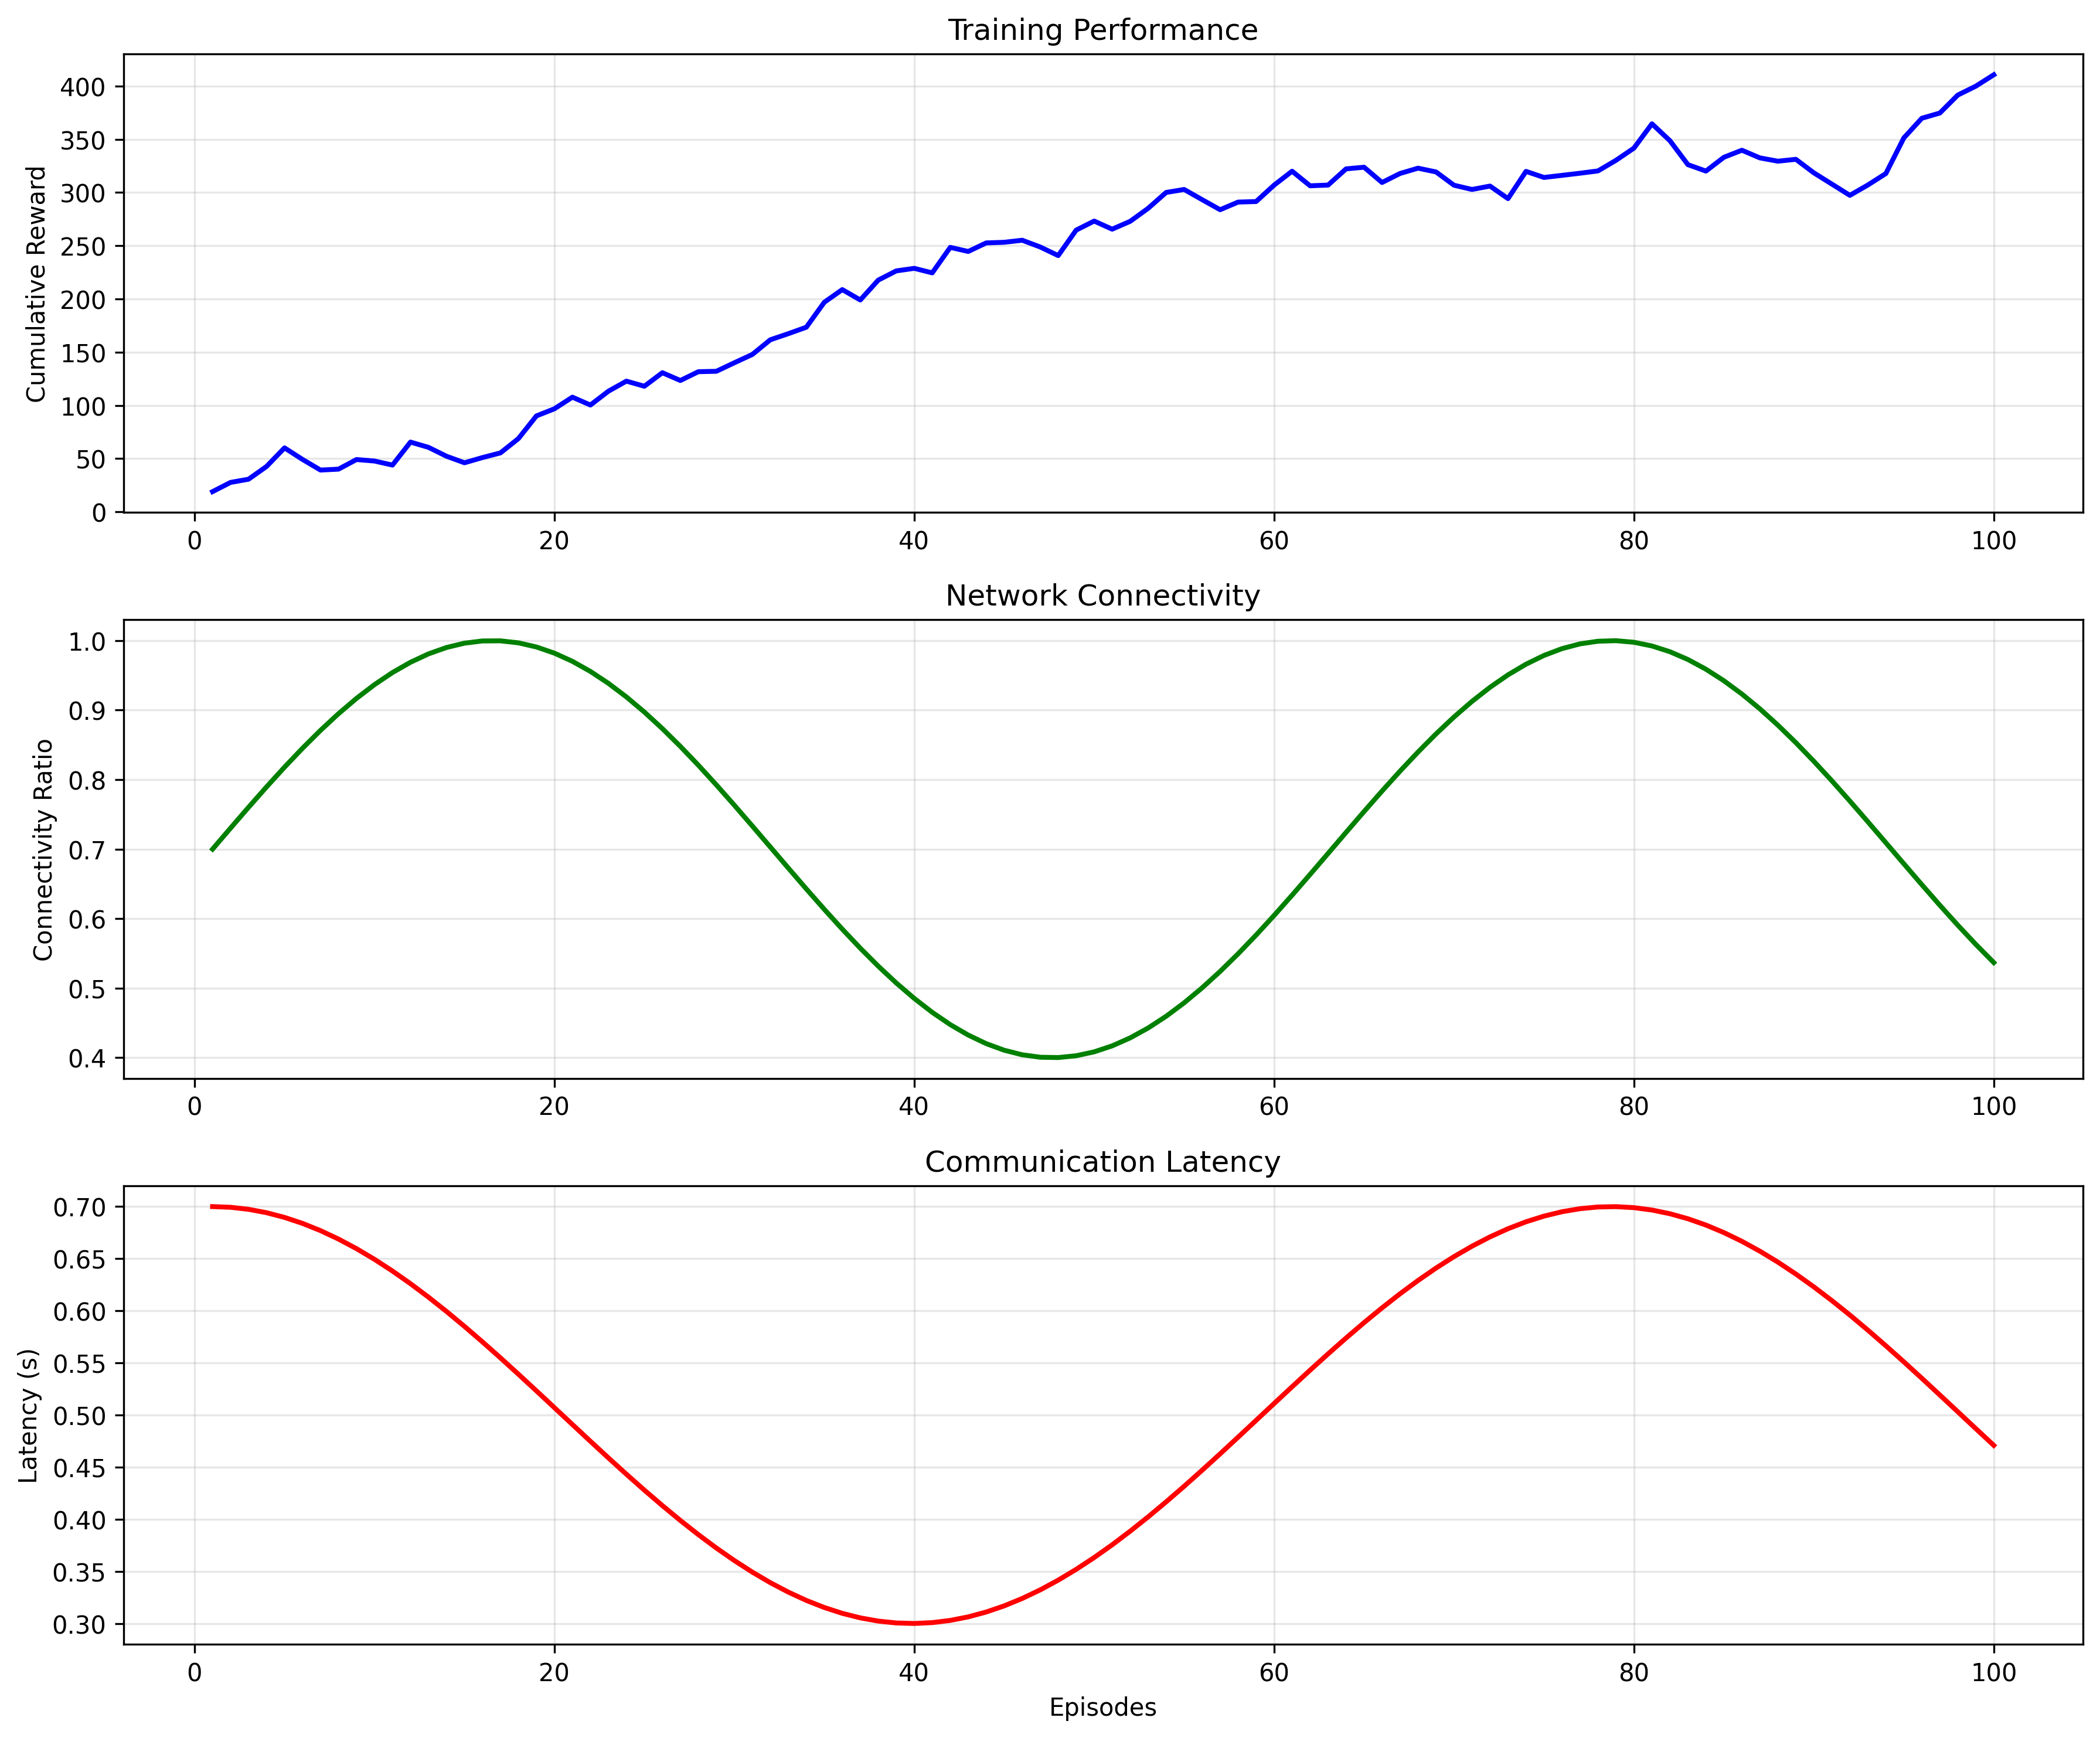


Displaying fanet_battery.png:


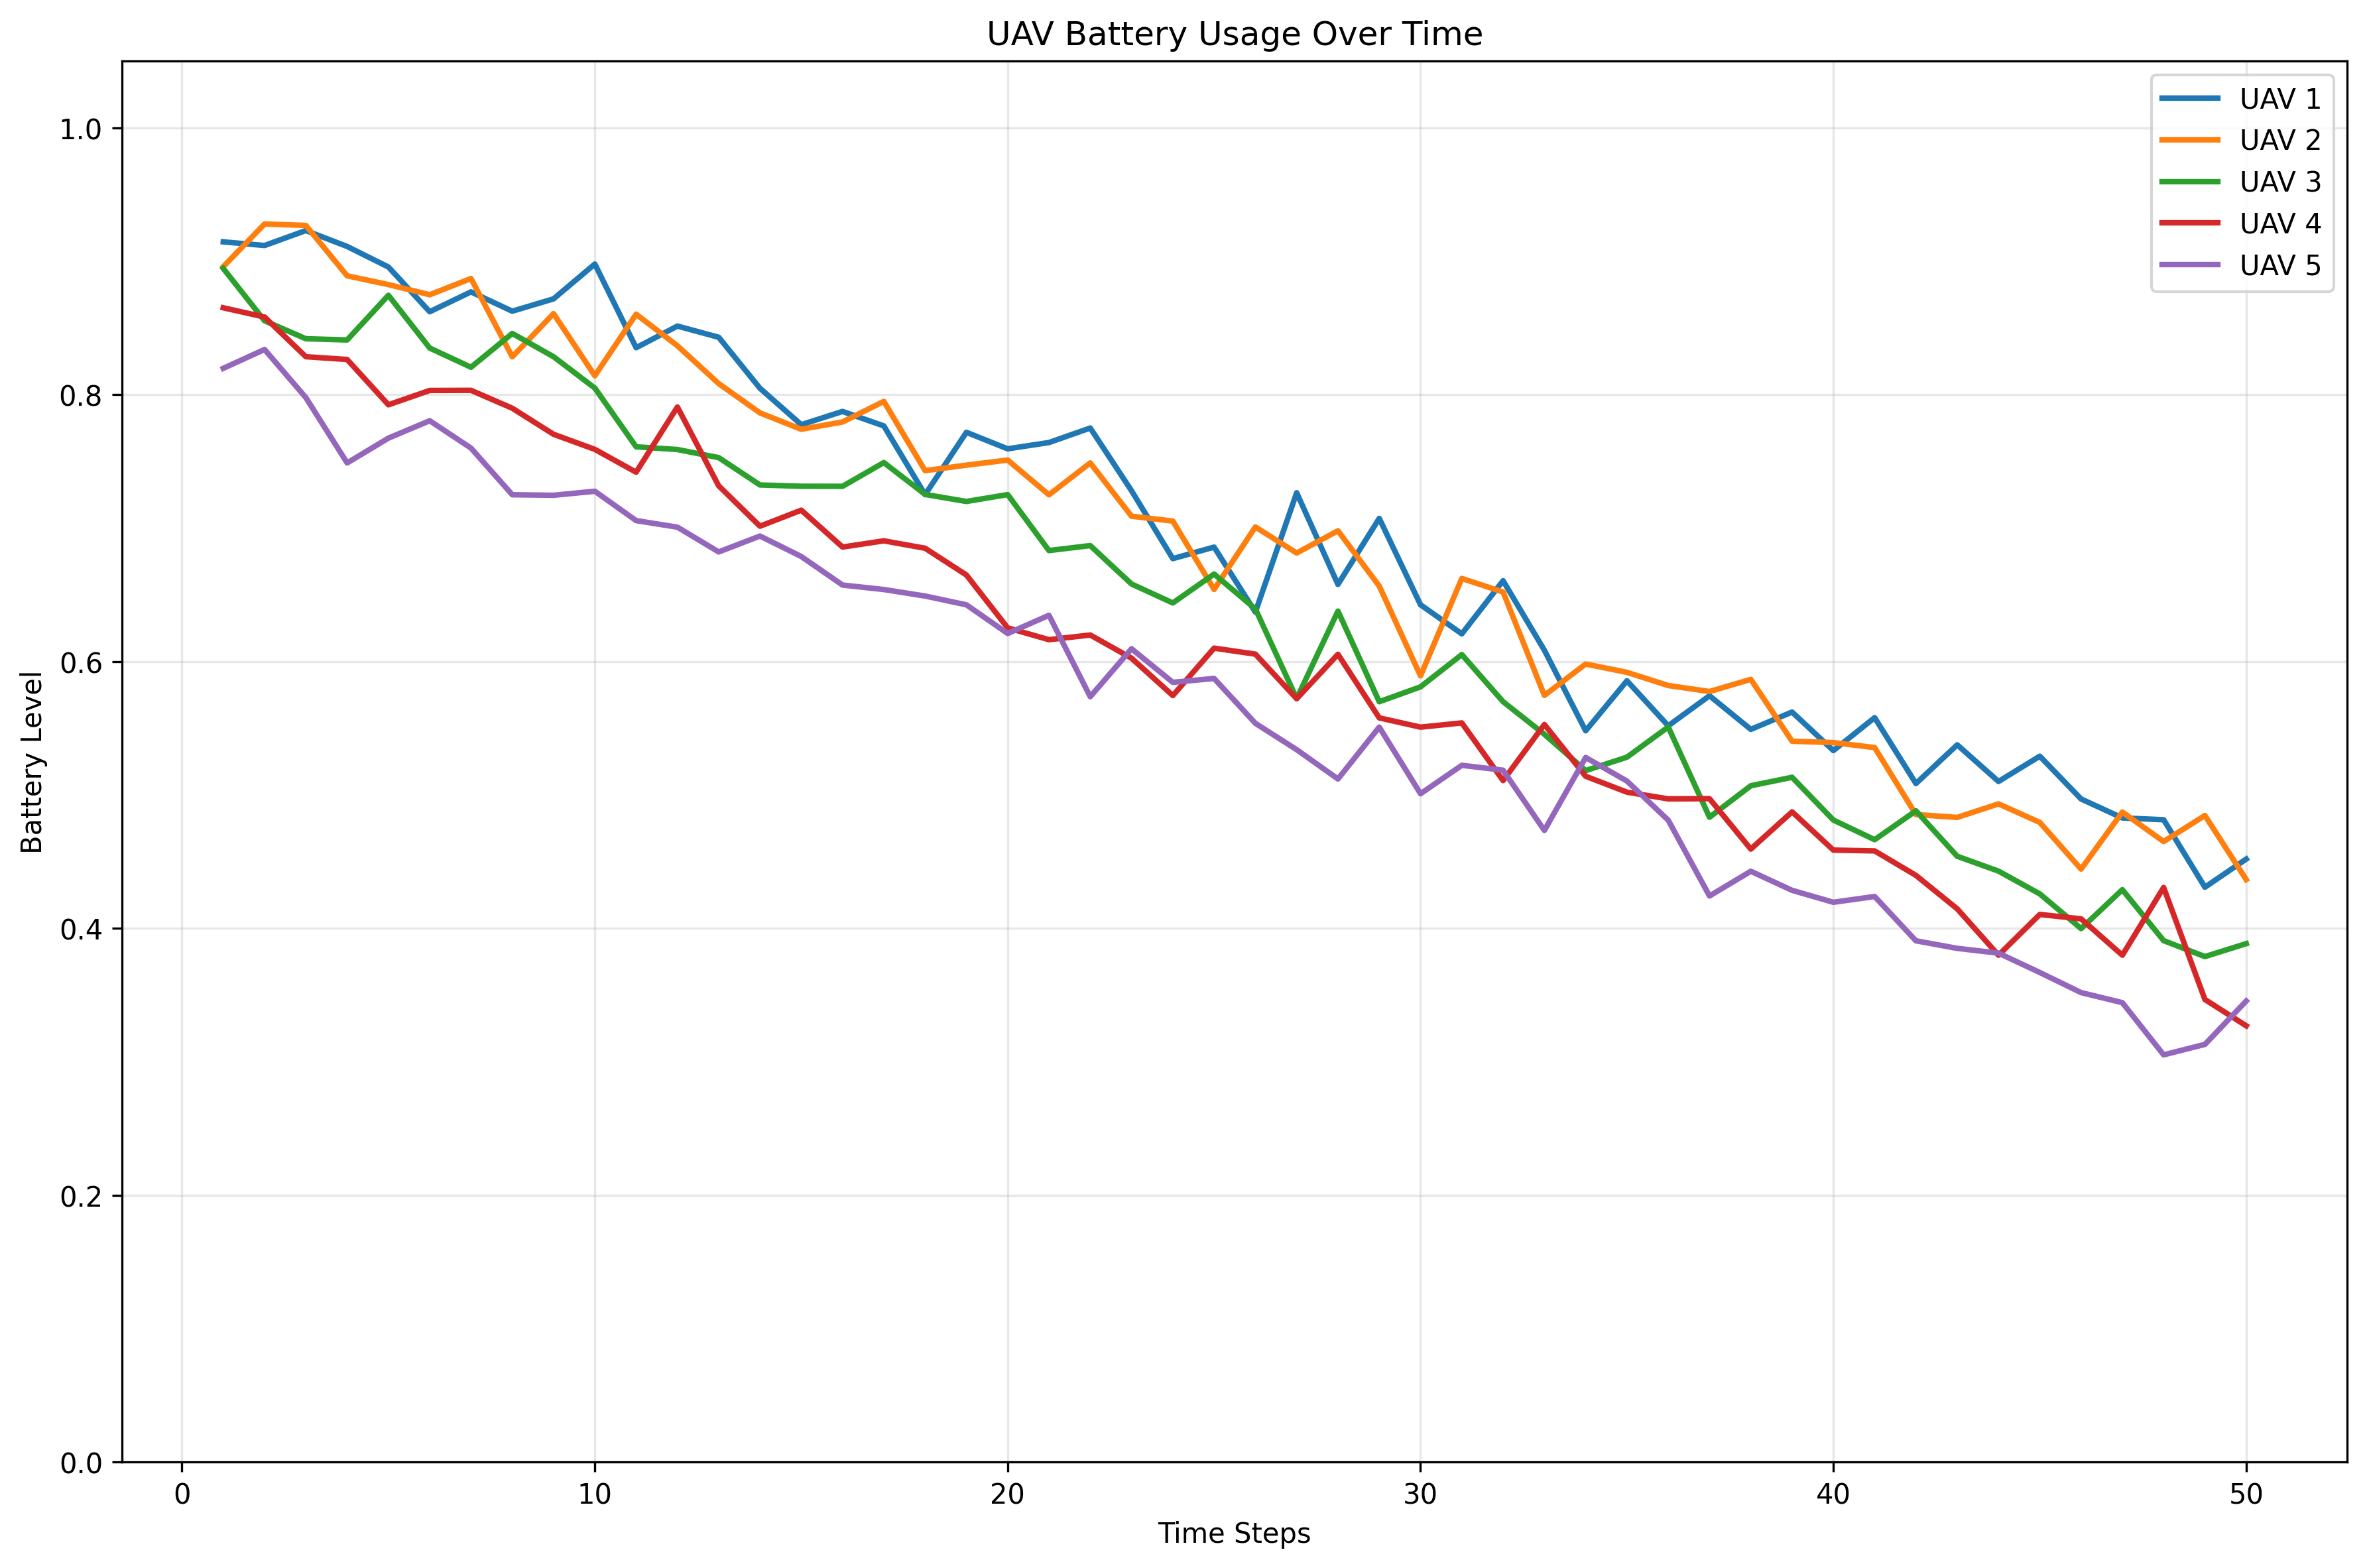

In [ ]:
from IPython.display import Image, display

print("Displaying fanet_network.png:")
display(Image('fanet_network.png'))

print("\nDisplaying fanet_performance.png:")
display(Image('fanet_performance.png'))

print("\nDisplaying fanet_battery.png:")
display(Image('fanet_battery.png'))